In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import json


colors = sns.color_palette("muted").as_hex()
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = ["Computer Modern"]
mpl.rcParams["text.usetex"] = True
mpl.rcParams["figure.figsize"] = (9, 5)

In [2]:
df_dict = {}
for proj in ["JPetStore", "DayTrader", "AcmeAir", "Plants"]:
	with open(f"../results/Mo2oM_FullResults/Mo2oM_{proj}.json") as f:
		data = json.load(f)
	df = pd.DataFrame(data).drop(["microservices", "n_clusters"], axis=1)
	df = df.groupby("threshold", as_index=False).mean()
	df = df[(df["threshold"] != 0) & (df["threshold"] != 1)]
	df["overall"] = 0.75 + 0.25 * df["SM"] - 0.25 * df["ICP"] - 0.25 * df["NED"] - 0.25 * df["IFN"]
	df_dict[proj] = df

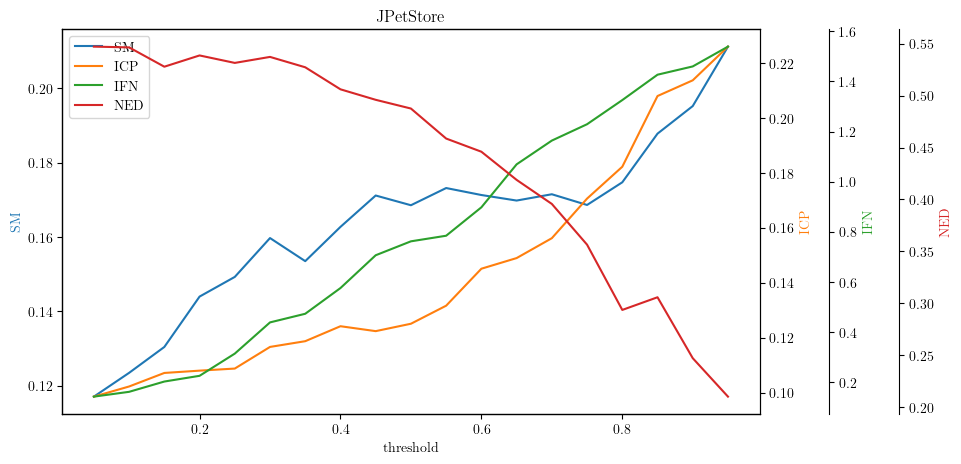

In [3]:
fig, ax = plt.subplots()
ax.set_title("JPetStore")
twin1 = ax.twinx()
twin2 = ax.twinx()
twin3 = ax.twinx()
twin2.spines.right.set_position(("axes", 1.1))
twin3.spines.right.set_position(("axes", 1.2))
p1, = ax.plot(df_dict["JPetStore"]["threshold"], df_dict["JPetStore"]["SM"], "-C0", label="SM")
p2, = twin1.plot(df_dict["JPetStore"]["threshold"], df_dict["JPetStore"]["ICP"], "-C1", label="ICP")
p3, = twin2.plot(df_dict["JPetStore"]["threshold"], df_dict["JPetStore"]["IFN"], "-C2", label="IFN")
p4, = twin3.plot(df_dict["JPetStore"]["threshold"], df_dict["JPetStore"]["NED"], "-C3", label="NED")
# p1.set_color(colors[0])
# p2.set_color(colors[1])
# p3.set_color(colors[2])
# p4.set_color(colors[3])
ax.set(xlabel="threshold", ylabel="SM")
twin1.set(ylabel="ICP")
twin2.set(ylabel="IFN")
twin3.set(ylabel="NED")
ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())
twin3.yaxis.label.set_color(p4.get_color())
ax.legend(handles=[p1, p2, p3, p4])
fig.savefig("JPetStoreLineChart.pdf", bbox_inches="tight")

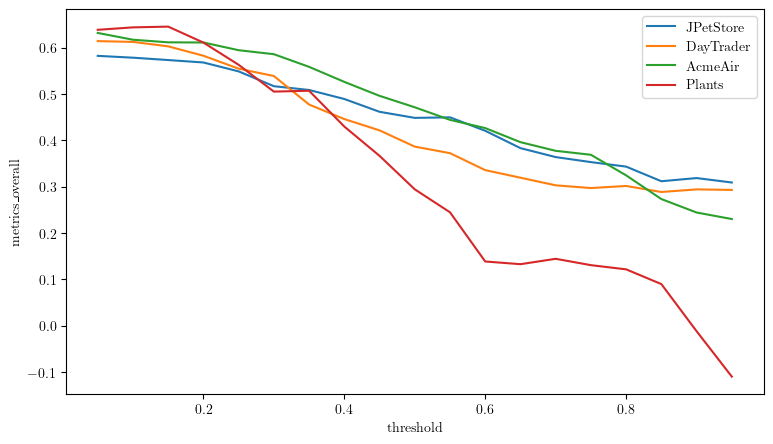

In [4]:
projects_overall = {proj: df["overall"] for proj, df in df_dict.items()}
projects_overall["threshold"] = df_dict["JPetStore"]["threshold"]
projects_overall = pd.DataFrame(projects_overall).set_index("threshold")
ax = projects_overall.plot(ylabel="metrics_overall")  # colormap="crest")
ax.get_figure().savefig("OverallLineChart.pdf", bbox_inches="tight")

In [5]:
projects_overall
# 0.05 - 0.25

,JPetStore,DayTrader,AcmeAir,Plants
threshold,,,,
0.05,0.582123,0.613924,0.631547,0.638325
0.10,0.578195,0.612226,0.616952,0.643566
0.15,0.573098,0.602662,0.611302,0.645183
0.20,0.567851,0.582412,0.610945,0.610789
0.25,0.548648,0.554523,0.594316,0.562859
0.30,0.516704,0.538678,0.585726,0.505043
0.35,0.508524,0.477164,0.558416,0.506893
0.40,0.489111,0.445815,0.526041,0.429707
0.45,0.461496,0.421427,0.495889,0.366503
